In [1]:
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt


# **Load data**

In [2]:
with open('windSpeed.pkl', 'rb') as f:
    data = pickle.load(f)

In [3]:
date = list(data.keys())
station = list(dict.fromkeys([i for i in date for i in list(data[i].keys())]))
dataSize = {i: np.zeros(4) for i in station}    

dataSize

{'15065180': array([0., 0., 0., 0.]),
 '15075501': array([0., 0., 0., 0.]),
 '15065050': array([0., 0., 0., 0.]),
 '15065170': array([0., 0., 0., 0.]),
 '15065501': array([0., 0., 0., 0.]),
 '15085020': array([0., 0., 0., 0.]),
 '15035020': array([0., 0., 0., 0.]),
 '15065040': array([0., 0., 0., 0.]),
 '15060070': array([0., 0., 0., 0.]),
 '15070040': array([0., 0., 0., 0.])}

In [4]:
codeStation = []
for value in list(data.keys()):
    #print(" \n -------------- {} -------------- ".format(value))
    
    if value == '1990-1999':
        i = 0
    elif value == '2000-2009':
        i = 1
    elif value == '2010-2019':
        i = 2
    elif value == '2020-2023':
        i = 3
    
    for station in list(data[value].keys()):        
        codeStation.append(station)
        if type(data[value][station]) == str:
            dataSize[station][i] = int(0)                     
        else:            
            dataSize[station][i] = int(data[value][station].shape[0])

dataSize        

{'15065180': array([219220., 229983.,  59739.,   2887.]),
 '15075501': array([219220., 229983.,  59739.,      0.]),
 '15065050': array([219220., 229983.,  59739.,      0.]),
 '15065170': array([219220.,      0.,      0.,      0.]),
 '15065501': array([219220., 229983.,  59739.,      0.]),
 '15085020': array([219220., 229983.,      0.,      0.]),
 '15035020': array([219220., 229983.,  59739.,      0.]),
 '15065040': array([    0.,     0., 59739.,     0.]),
 '15060070': array([     0., 229983.,      0.,      0.]),
 '15070040': array([     0., 229983.,      0.,      0.])}

# **Size data**

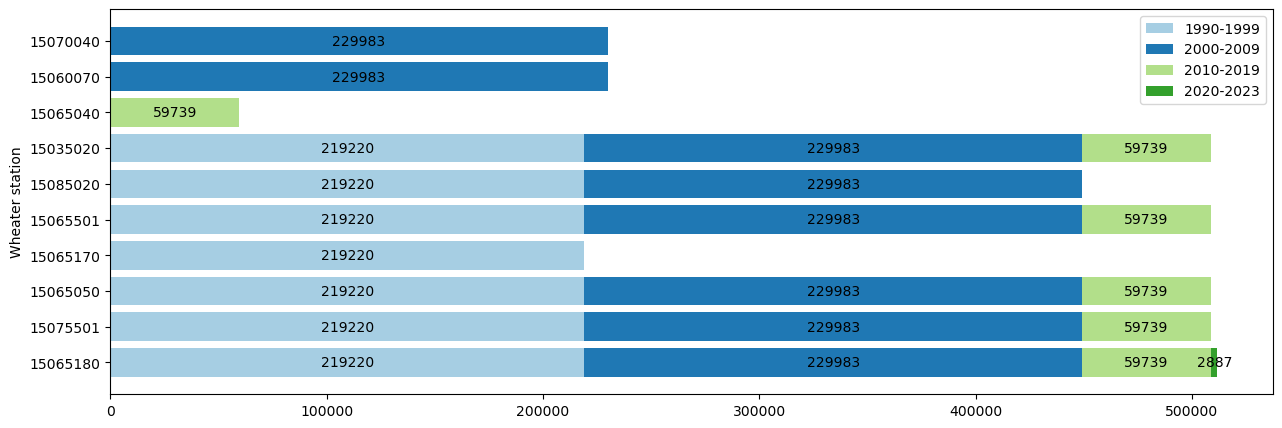

In [5]:
labels = list(dataSize.keys())
values = np.array(list(dataSize.values()))
colors = ['#A6CEE3', '#1F78B4', '#B2DF8A', '#33A02C']
decades = ['1990-1999', '2000-2009', '2010-2019', '2020-2023']

fig, ax = plt.subplots(figsize=(15, 5))

# Plot bar
ax.barh(labels, values[:, 0], color=colors[0])
ax.barh(labels, values[:, 1], left=values[:, 0], color=colors[1])
ax.barh(labels, values[:, 2], left=values[:, :2].sum(axis=1), color=colors[2])
ax.barh(labels, values[:, 3], left=values[:, :3].sum(axis=1), color=colors[3])

# Labels
for i in range(len(labels)):
    for j in range(len(values[i])):
        if values[i,j] != 0:
            ax.text(values[i,j]/2 + values[i,:j].sum(), i, int(values[i,j]), ha='center', va='center', color='black')

ax.set_ylabel('Wheater station')
ax.legend(decades)
plt.show()

# **Distribution of the time-series**

In [6]:
codeStation = list(dict.fromkeys(codeStation))
codeStation

['15065180',
 '15075501',
 '15065050',
 '15065170',
 '15065501',
 '15085020',
 '15035020',
 '15065040',
 '15060070',
 '15070040']


  ------------------------------------------------------------   15065180   ------------------------------------------------------------  



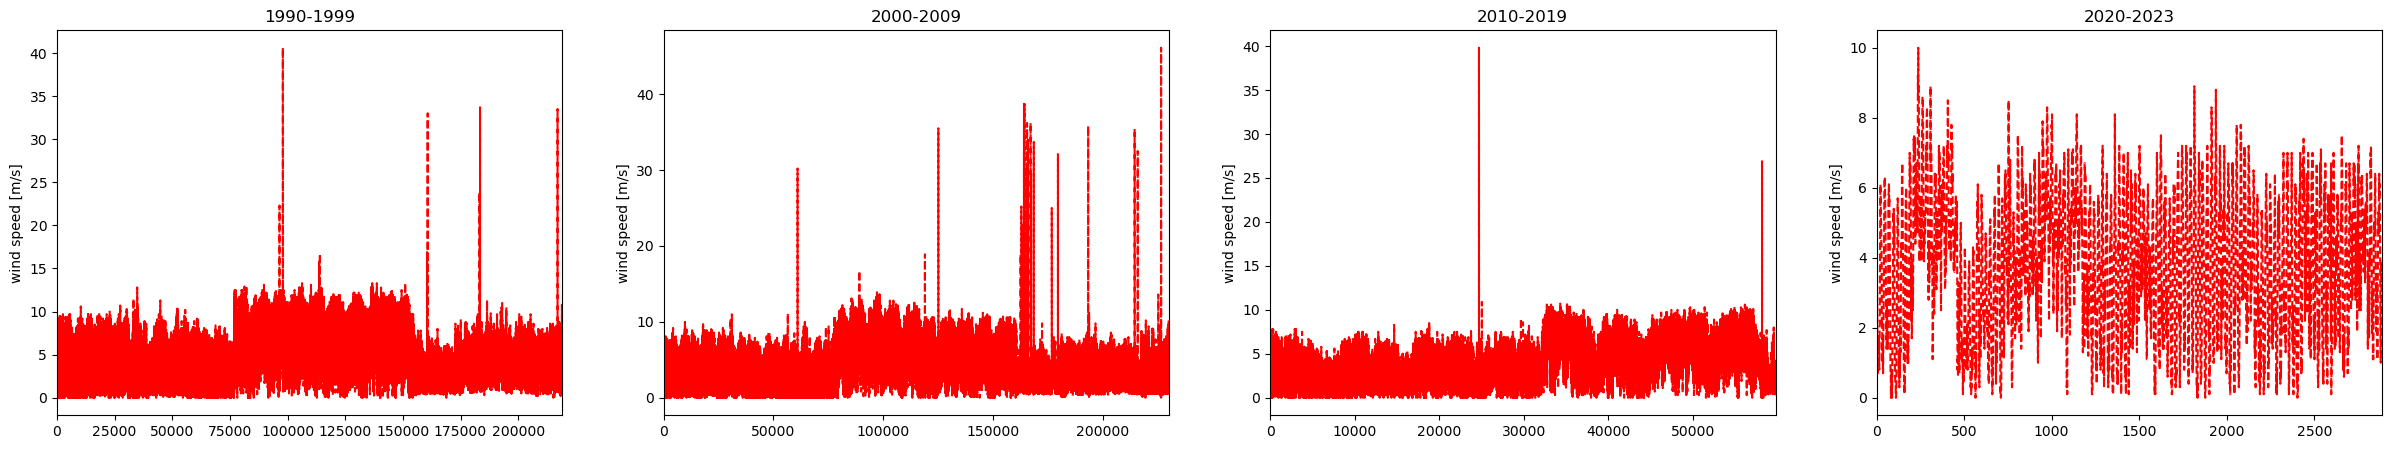


  ------------------------------------------------------------   15075501   ------------------------------------------------------------  



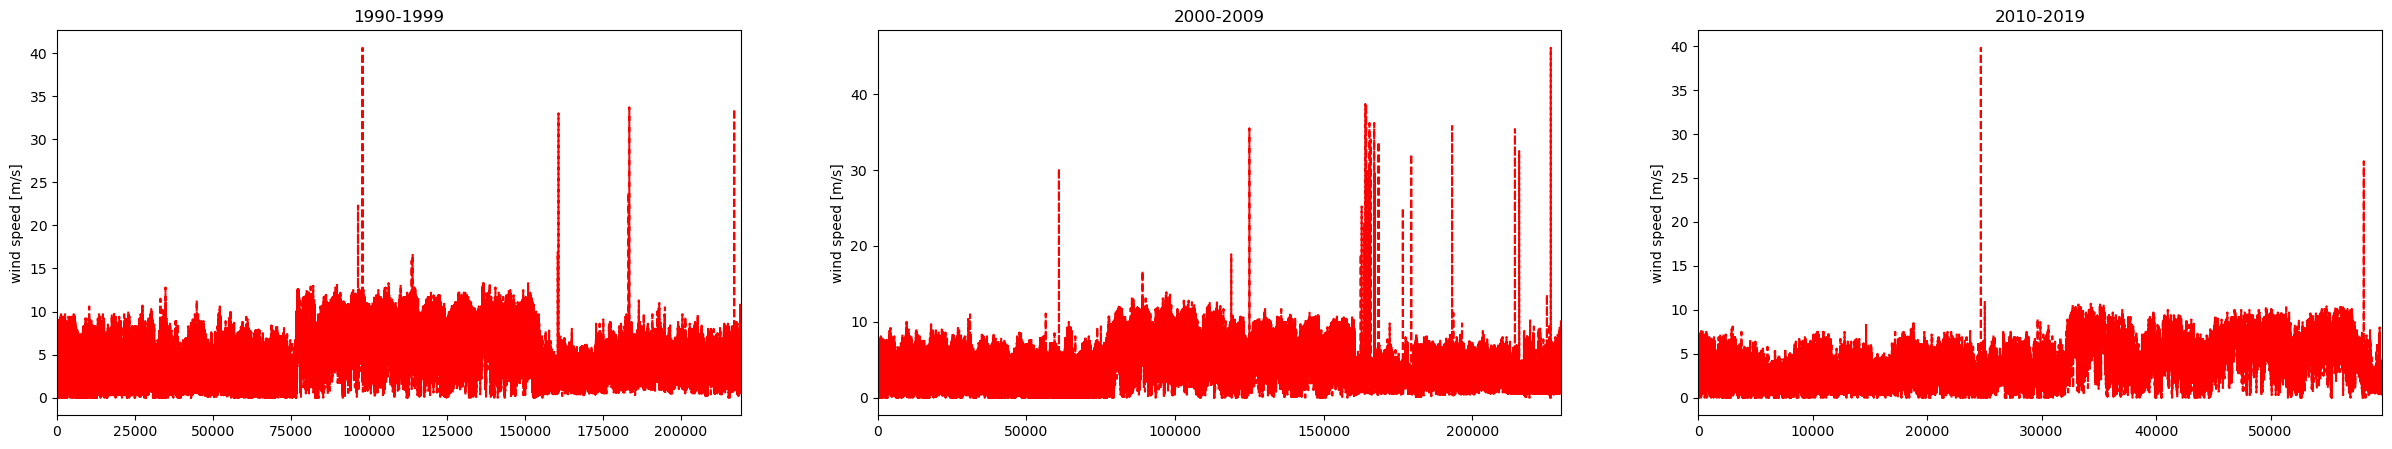


  ------------------------------------------------------------   15065050   ------------------------------------------------------------  



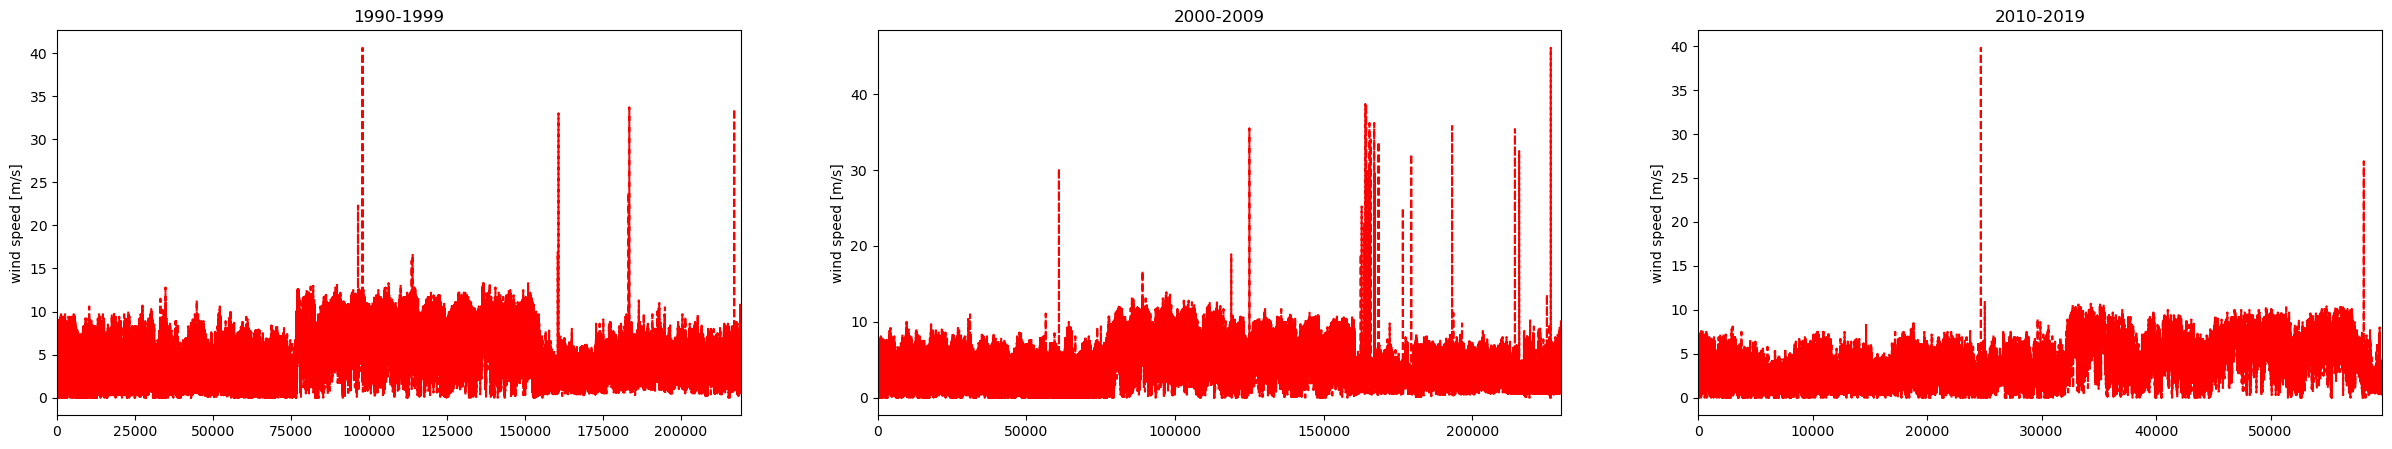


  ------------------------------------------------------------   15065170   ------------------------------------------------------------  



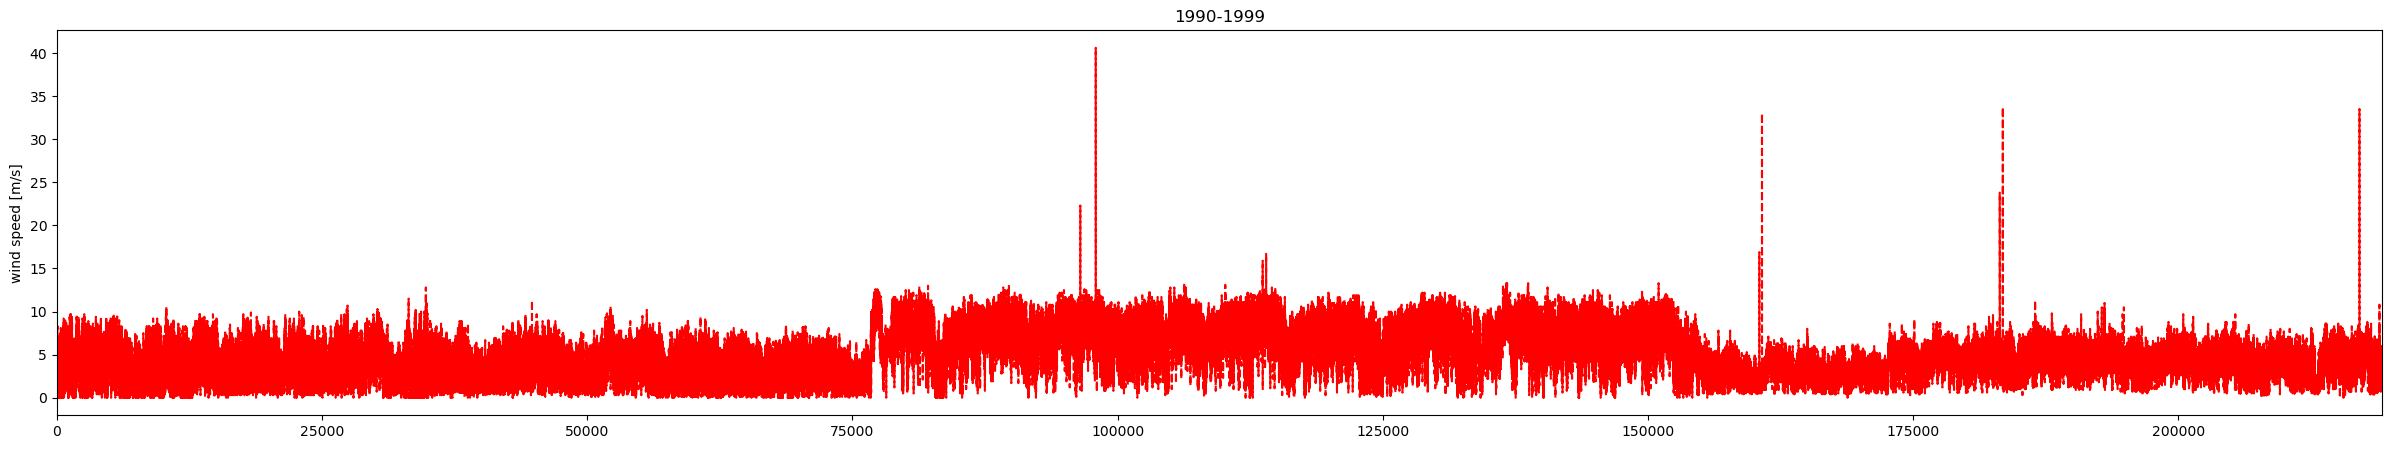


  ------------------------------------------------------------   15065501   ------------------------------------------------------------  



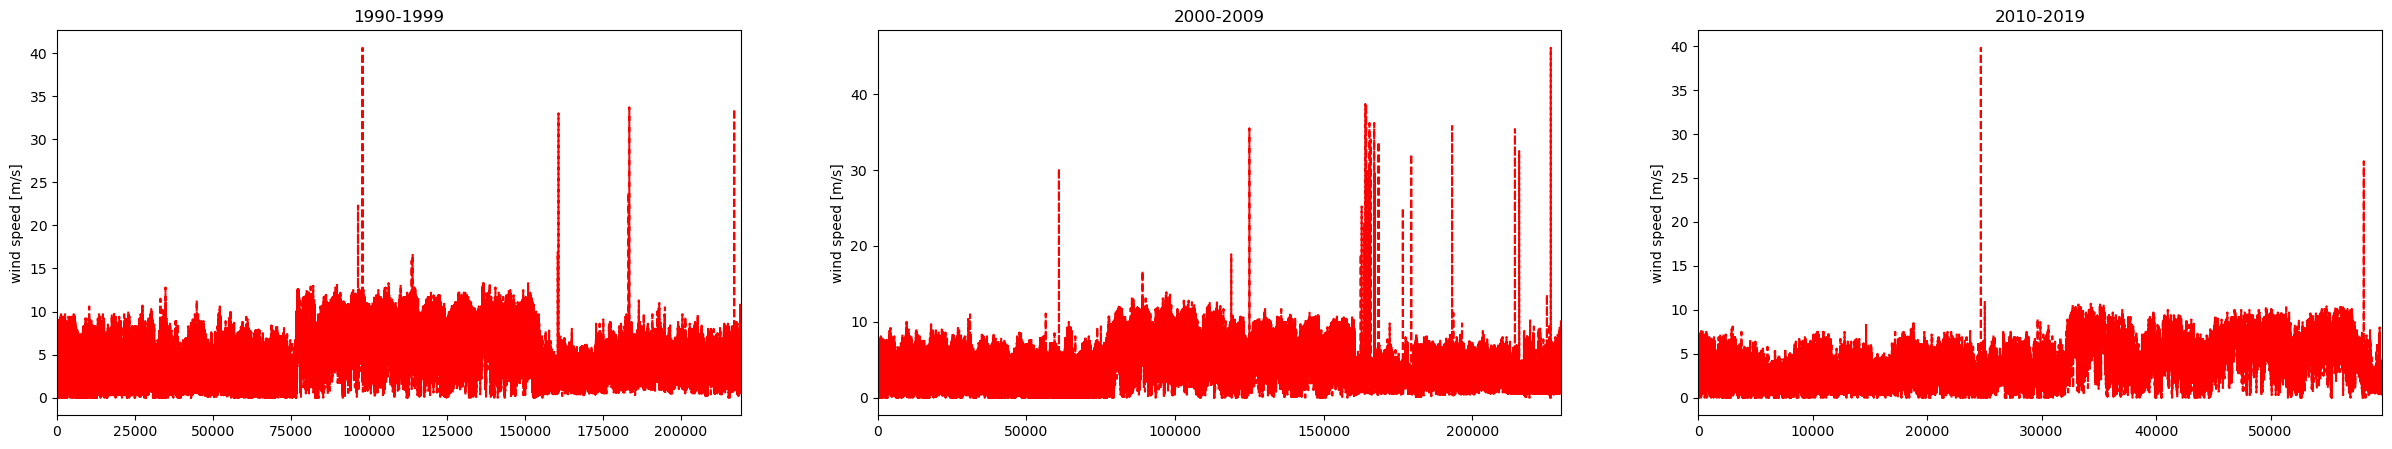


  ------------------------------------------------------------   15085020   ------------------------------------------------------------  



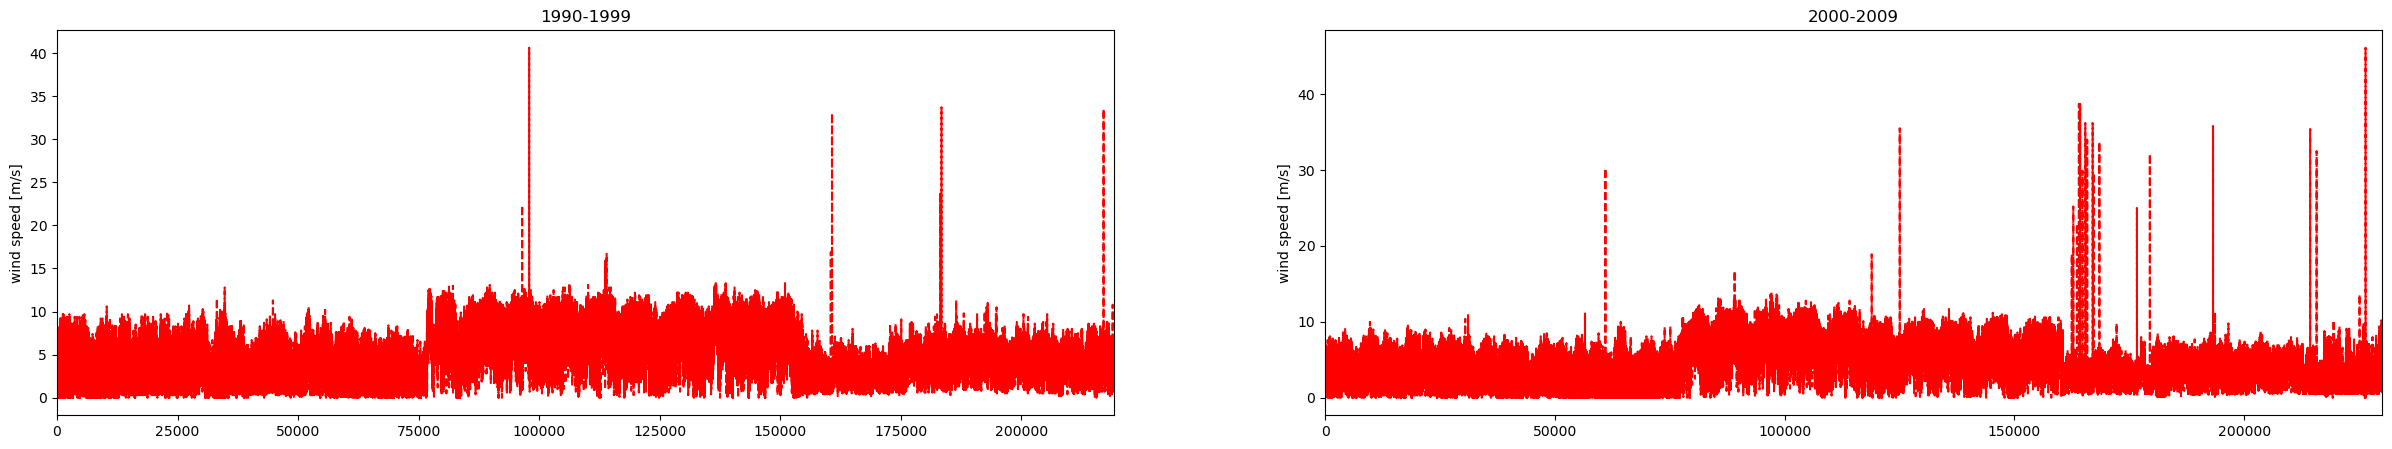


  ------------------------------------------------------------   15035020   ------------------------------------------------------------  



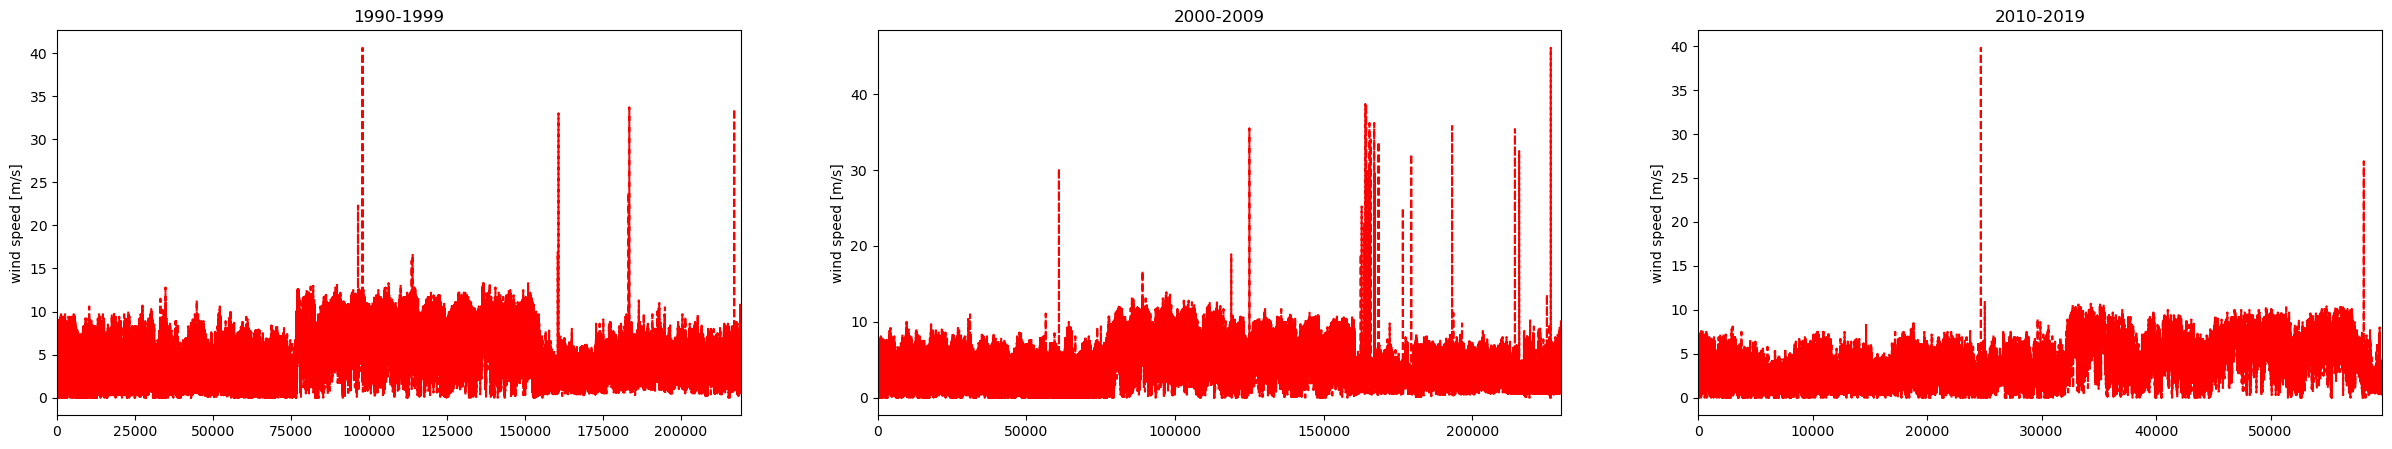


  ------------------------------------------------------------   15065040   ------------------------------------------------------------  



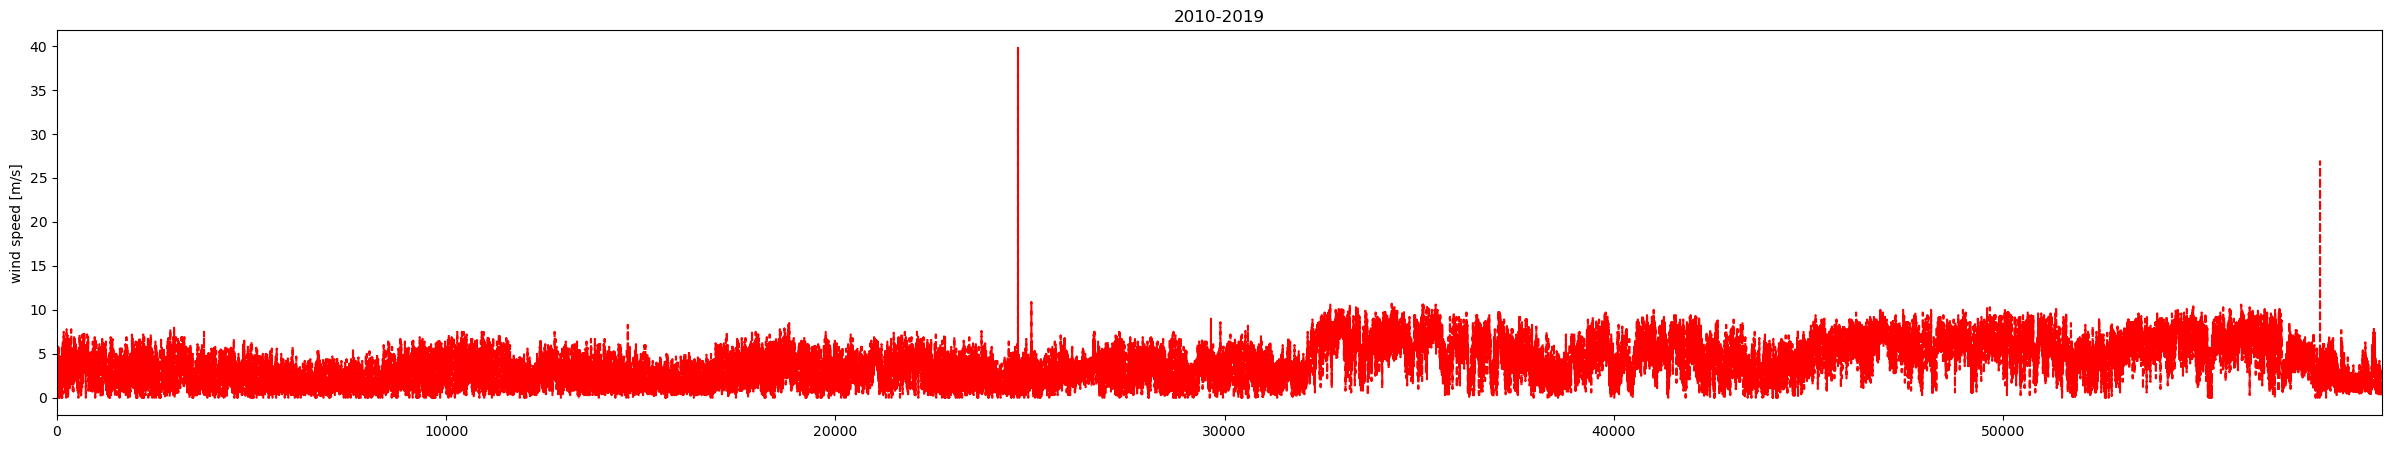


  ------------------------------------------------------------   15060070   ------------------------------------------------------------  



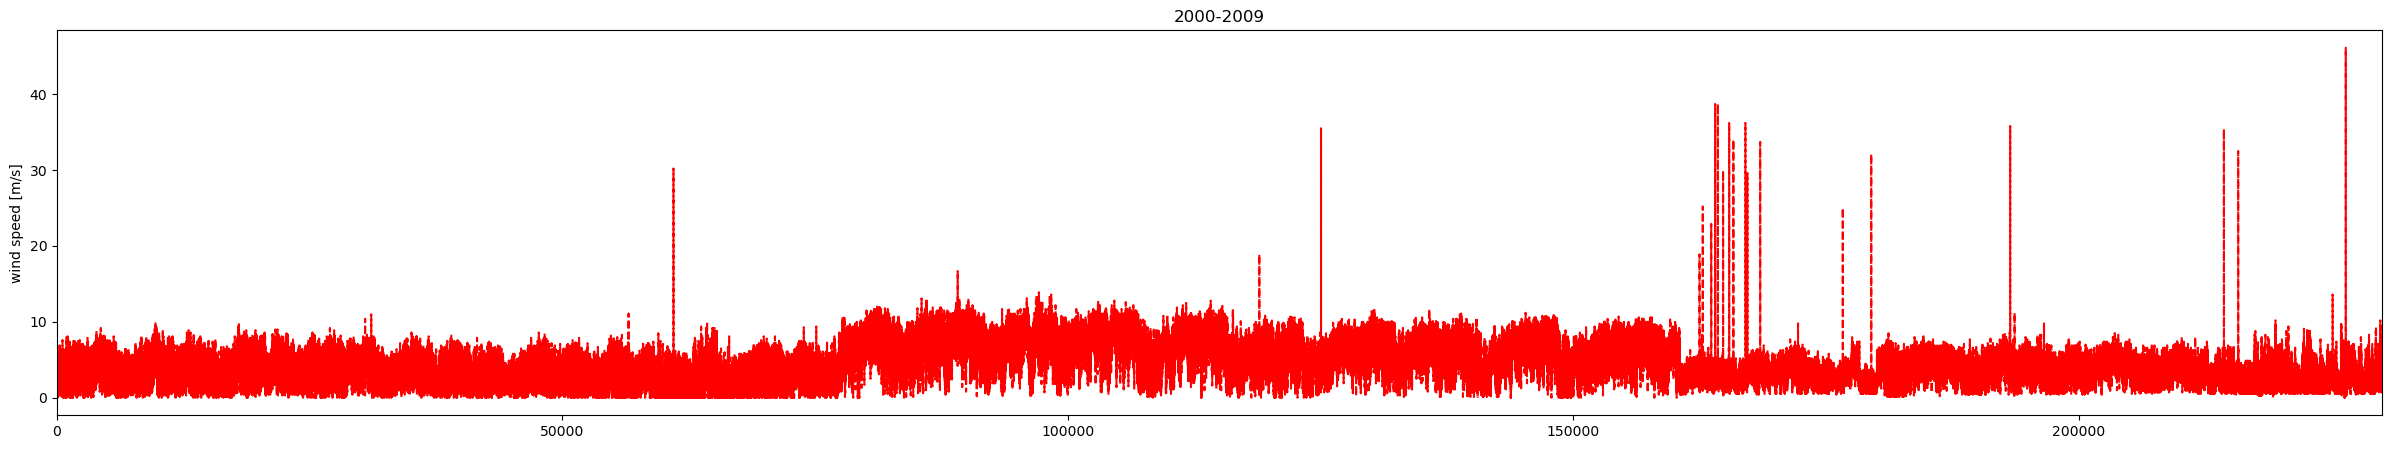


  ------------------------------------------------------------   15070040   ------------------------------------------------------------  



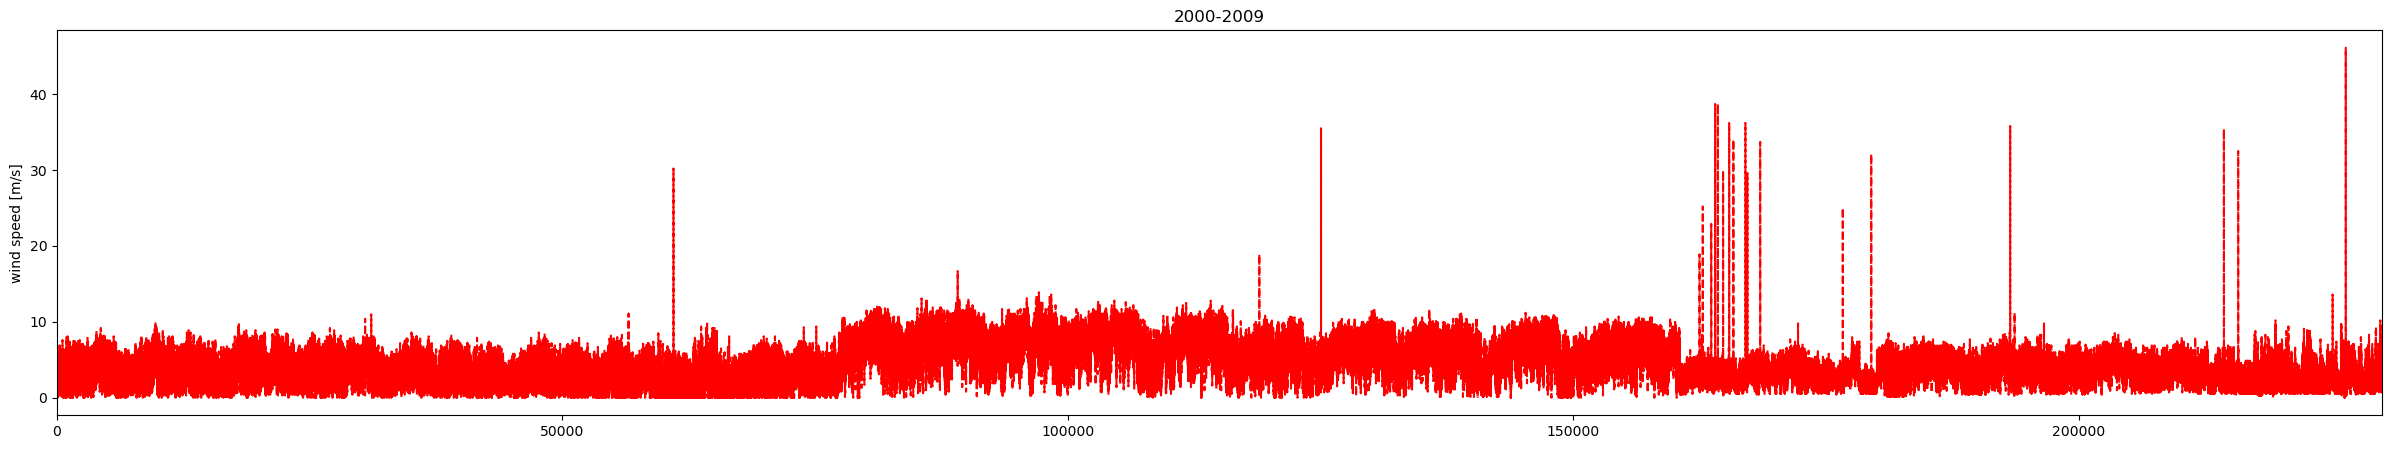

In [7]:
for station, i in zip(codeStation, range(len(codeStation))):
    
    index = np.where(dataSize[station] > 0)[0].tolist()
    count = 1
    print('\n  {value}   {station}   {value}  \n'.format(value='-'*60, station=station))
    
    timeSerieAux = np.array([],dtype=float)
    plt.figure(figsize=(30,5))
    for j in index: 
        decade = decades[j]        
        timeSerie = data[decade][station]['Valor']
        timeSerieAux = np.hstack((timeSerieAux, timeSerie.to_numpy()))
        
        plt.subplot(1, len(index), count)
        plt.title(decade)
        plt.plot(timeSerie.to_numpy(), linestyle='--', c='r')
        plt.xlim(0, len(timeSerie))
        plt.ylabel("wind speed [m/s]")        
        count += 1 
    plt.show()
    
    """
    plt.figure(figsize=(5,2))
    plt.hist(timeSerieAux, 30 )
    plt.show()
    """
    
        

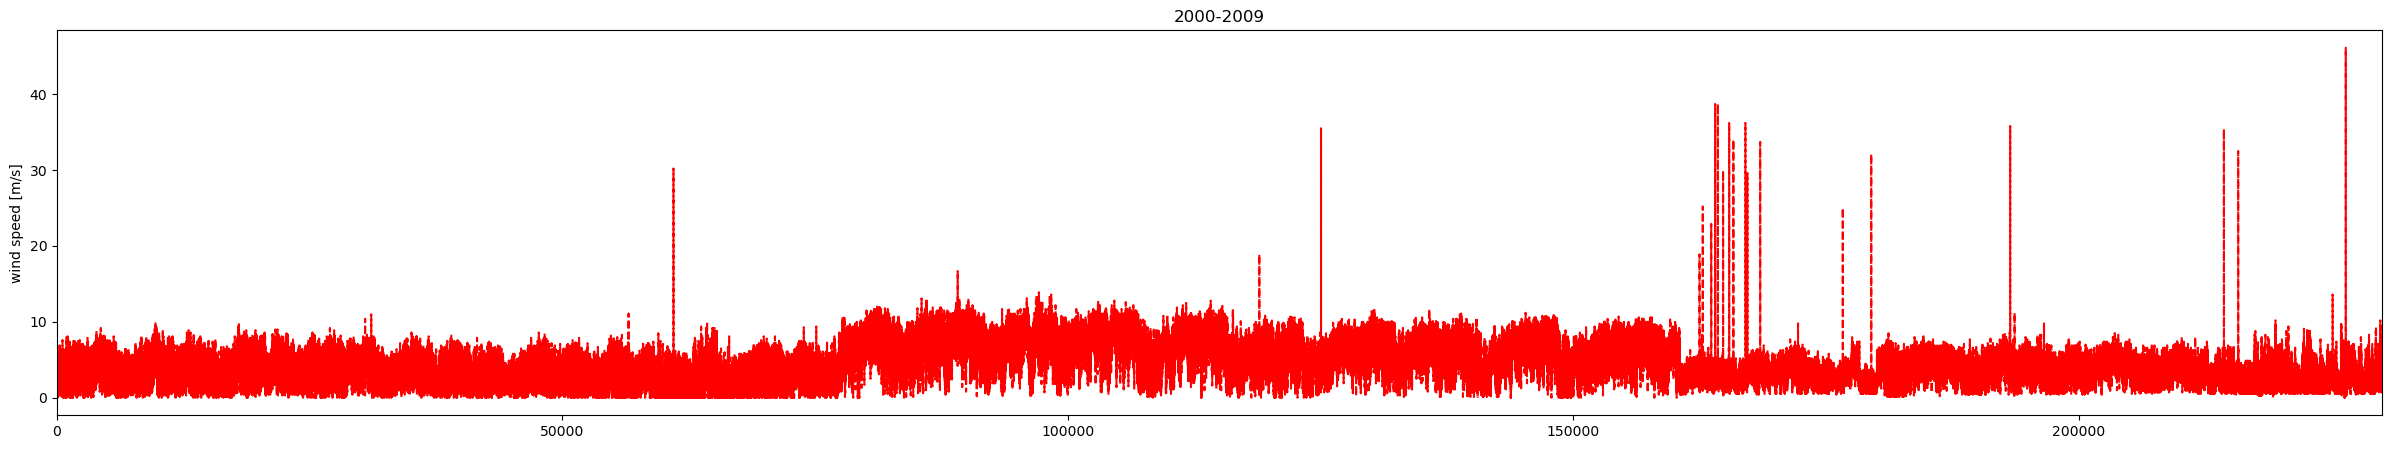

In [8]:
plt.figure(figsize=(30,5))
plt.plot(timeSerie.to_numpy(), linestyle='--', c='r')
plt.title(decade)
plt.xlim(0, len(timeSerie))
plt.ylabel("wind speed [m/s]")
plt.show()
